In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def make_vandemonde(pontos_x):
  dim = np.shape(pontos_x)

  vdm_x = np.zeros((dim[0], 2))
  #print(vdm_x)

  for i in range(0, dim[0]):
    vdm_x[i][0] = 1
    vdm_x[i][1] = pontos_x[i]

  #print(vdm_x)

  return vdm_x

#Dependendo da função, redigite do jeito da questão
def f(x, a0, a1):
  return a0*x+a1*x**3

#**Regressão Linear Com Minimos Quadrados**

A Regressão Linear é uma maneira de prever futuros resultados a partir dos obtidos, porém deve haver um padrão linear nesses pontos.

Em suma, iremos ajustar uma reta que melhor expressa esses resultados com o menor erro possivel.



A equação da reta é:

$y = a_0 + a_1x$

Porém existe um erro que deve ser considerado, pois não haverá uma reta que irá passar exatamente em todos os pontos. Logo, a equação torna-se

$y = a_0 + a_1x + e$

O ajusto por Mínimos Quadrados é feito para minimizar a soma dos quadrados dos erros em todos os pontos, ou seja, a diferença entre o $y$ da função e o $y$ observado.

$\sum\limits_{i=1}^n{(y_{i, observado}-y_{i, aproximado})^2}$


Podemos encontrar o menor erro a partir da equação:

$X^TXâ = X^TY$

Onde a matriz $X$ é a matriz que possui os coeficientes $x$ das equações, ou seja, se a equação é:

$y = a_0x^2 + a_1x^3$

A matriz $X$ será:

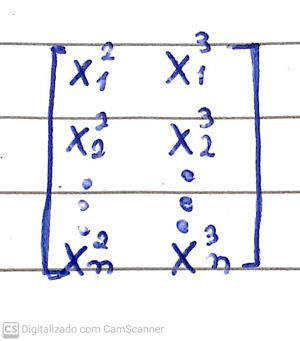


caso seja uma equaçção linear:

$y = a_0 + a_1x$

A matriz será uma de Vandemonde, onde a primeira coluna será somente de 1 e a segunda dependerá do termo $x$


Para encontrarmos as soluções $a_0$ e $a_1$, devemos realizar uma operação matricial:

$â = (X^TX)^{-1}(XY)$

**Erro Quadratico**

Para encontrar o erro quadratico basta
solucionarmos a equação em questão em função de $e$:

$e = Xâ - c$

Essa equação irá nos retornar o vetor erro, após acha-lo temos que calcular seu módulo para encontrar o erro "verdadeiramente":

$EQ = |e|^2$

#**Exemplo Qualquer**

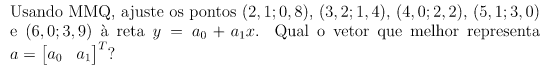

Primeiro criamos as matrizes de acordo com os pontos

In [ ]:
x = np.array([
              [2.1],
              [3.2],
              [4.0],
              [5.1],
              [6.0]
              ])

c = np.array([
              [0.8],
              [1.4],
              [2.2], 
              [3.0], 
              [3.9]
              ])


Depois devemos criar a matriz $X$. Como a questão disse que a equação é uma linear, a matriz $X$ será uma de vandemonde.

In [ ]:
X = np.ones((5,1))

X = np.concatenate((X, x),1)

print(X,"\n")

X_t = np.transpose(X)


print(X_t)

[[1.  2.1]
 [1.  3.2]
 [1.  4. ]
 [1.  5.1]
 [1.  6. ]] 

[[1.  1.  1.  1.  1. ]
 [2.1 3.2 4.  5.1 6. ]]


Realizamos as operações matriciais para encontramos os valores de $a_0$ e $a_1$

In [ ]:
#Xtx = np.dot(X_t, X)
Xtx = X_t @ X

print(f'X^t * X = \n{Xtx}\n')

#Xtc = np.dot(X_t, y)
Xtc = X_t @ c
print(f'X^t * Y = \n{Xtc}\n')


X^t * X = 
[[ 5.   20.4 ]
 [20.4  92.66]]

X^t * Y = 
[[11.3 ]
 [53.66]]



In [ ]:
for i in range(0,2):
    print(f'{Xtx[i][0]}*a0 +({Xtx[i][1]})*a1 = {Xtc[i]}')

5.0*a0 +(20.4)*a1 = [11.3]
20.4*a0 +(92.66)*a1 = [53.66]


In [ ]:
# Soluções do sistema. Tive que reorganizar o vetor, pois deve ser
#um vetor coluna, e o resultado aparece como um array de
#uma dimensão

sol = np.linalg.inv(Xtx)@Xtc
print(f'Soluções do sistema:\n{sol}\n')

a = np.array([sol[0], sol[1]])
print(f'Matriz vetor a: \n{a}')

Soluções do sistema:
[[-1.00988545]
 [ 0.80144251]]

Matriz vetor a: 
[[-1.00988545]
 [ 0.80144251]]


In [ ]:
#erro quad

e = X@a - c
print(e,"\n")

EQ = np.sum(np.abs(e**2))

print(EQ)

[[-0.12685617]
 [ 0.15473059]
 [-0.0041154 ]
 [ 0.07747136]
 [-0.10123038]] 

0.056300381841323854
